In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("AirSewa - Airport Services Data.csv")

In [16]:
df.head(5)

,airport,categoryenglish,categoryHindi,titleEnglish,titleHindi,descriptionEnglish,descriptionHindi,email,phone,website,last_updated
0,Chennai,Parking and Transportation,पार्किंग और परिवहन,Fast Track Car Rental services,NaN,Car Rental Services,NaN,mohanraj@fasttrackcalltaxi.in,9841050290,NaN,2024-10-14
1,Mumbai,Parking and Transportation,पार्किंग और परिवहन,AIRPORT CAB SERVICES,NaN,Prepaid & Cool Cab Services,NaN,NaN,8879275239,NaN,2024-10-14
2,Mumbai,Parking and Transportation,पार्किंग और परिवहन,TAB CAB SERVICES,NaN,TAB CAB Services,NaN,NaN,7738891598,NaN,2024-10-14
3,Mumbai,Parking and Transportation,पार्किंग और परिवहन,SHREE SAI CAR RENTAL SERVICES,NaN,Car Rental Services,NaN,NaN,9819791320,NaN,2024-10-14
4,Bengaluru,Parking and Transportation,पार्किंग और परिवहन,AIRPORT SHUTTLE SERVICE - VAYU VAJRA,NaN,The city shuttle service is the most comfortab...,NaN,ctmobmtc@gmail.com,08022952522,http://www.mybmtc.com/,2024-10-14


In [17]:
# Basic Information and Summary Statistics
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print(df.shape)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   airport             260 non-null    object 
 1   categoryenglish     260 non-null    object 
 2   categoryHindi       260 non-null    object 
 3   titleEnglish        260 non-null    object 
 4   titleHindi          0 non-null      float64
 5   descriptionEnglish  260 non-null    object 
 6   descriptionHindi    0 non-null      float64
 7   email               134 non-null    object 
 8   phone               177 non-null    object 
 9   website             32 non-null     object 
 10  last_updated        260 non-null    object 
dtypes: float64(2), object(9)
memory usage: 22.5+ KB
None

Summary Statistics:
        airport              categoryenglish        categoryHindi  \
count       260                          260                  260   
unique       10       

In [18]:
null_values = df.isnull().sum()
print(null_values)

airport                 0
categoryenglish         0
categoryHindi           0
titleEnglish            0
titleHindi            260
descriptionEnglish      0
descriptionHindi      260
email                 126
phone                  83
website               228
last_updated            0
dtype: int64


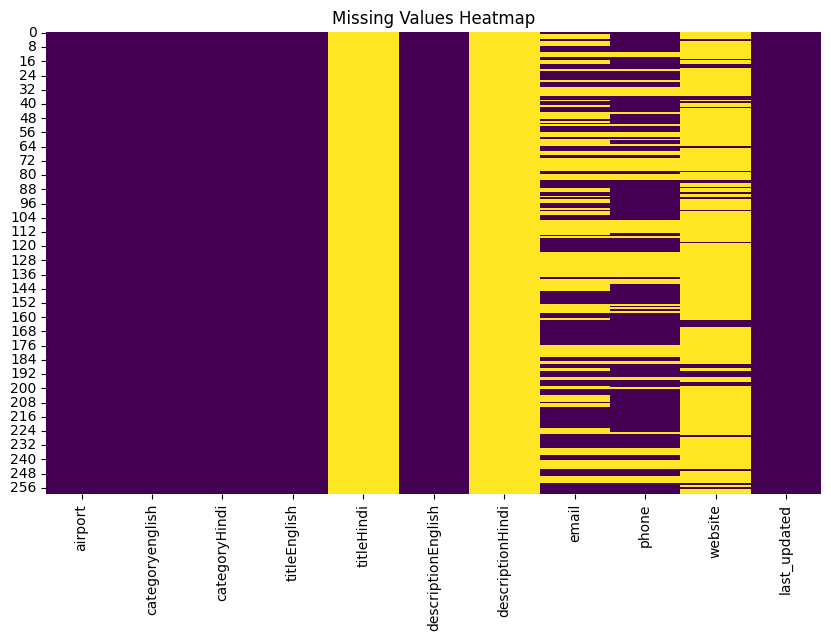

In [19]:
# Visualizing Missing Values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [20]:
df.drop(columns=['titleHindi', 'descriptionHindi', 'website'], inplace=True)

In [21]:

null_values = df.isnull().sum()
print(null_values)

airport                 0
categoryenglish         0
categoryHindi           0
titleEnglish            0
descriptionEnglish      0
email                 126
phone                  83
last_updated            0
dtype: int64


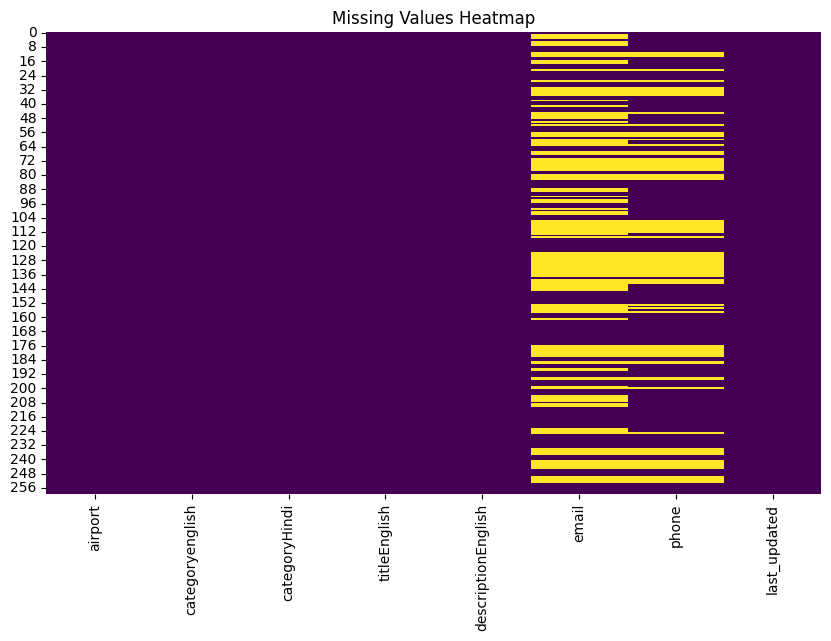

In [22]:
# Visualizing Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Category Distribution

C:\Users\onkar\AppData\Local\Temp\ipykernel_23524\738709918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["categoryenglish"], order=df["categoryenglish"].value_counts().index, palette="coolwarm")


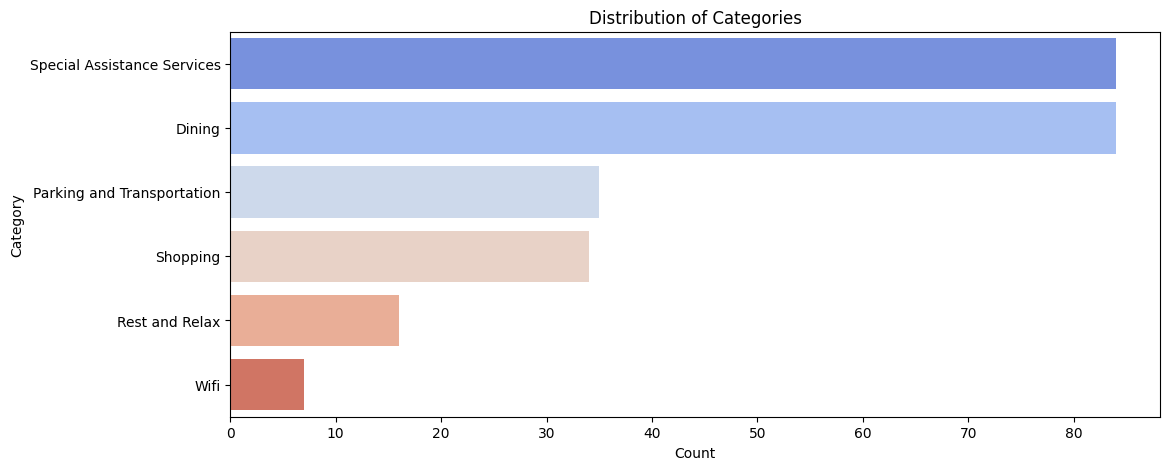

In [23]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["categoryenglish"], order=df["categoryenglish"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


### Airports with Most Services Listed

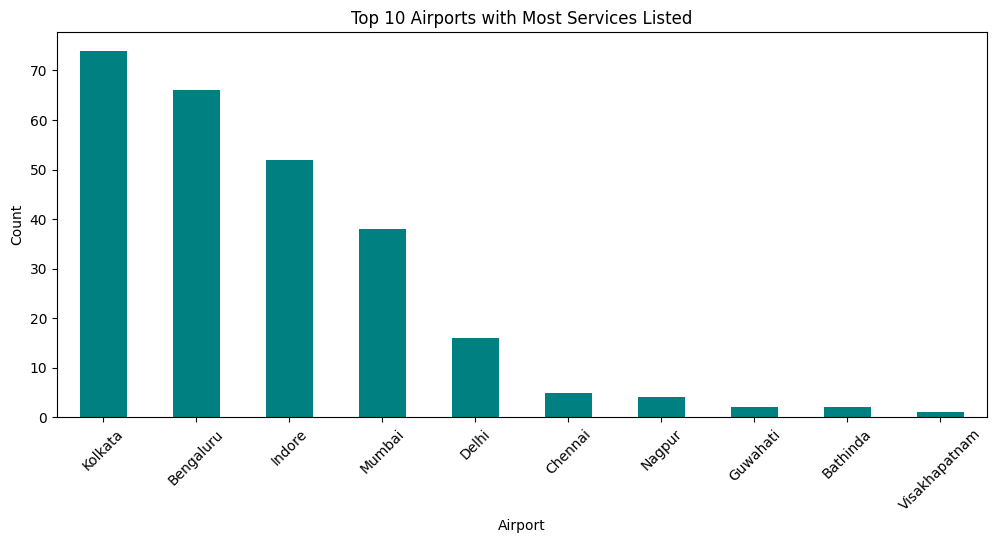

In [24]:
plt.figure(figsize=(12, 5))
df["airport"].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Airports with Most Services Listed")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Distribution of Emails & Phones Provided

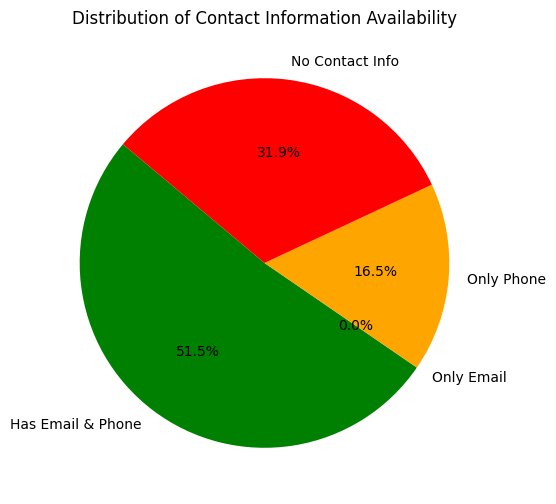

In [31]:
labels = ["Has Email & Phone", "Only Email", "Only Phone", "No Contact Info"]
sizes = [
    ((df["email"].notna()) & (df["phone"].notna())).sum(),  # Both email & phone available
    ((df["email"].notna()) & (df["phone"].isna())).sum(),  # Only email available
    ((df["email"].isna()) & (df["phone"].notna())).sum(),  # Only phone available
    ((df["email"].isna()) & (df["phone"].isna())).sum()   # Neither available
]

colors = ["green", "blue", "orange", "red"]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Distribution of Contact Information Availability")
plt.show()


### Most Common Services at Airports

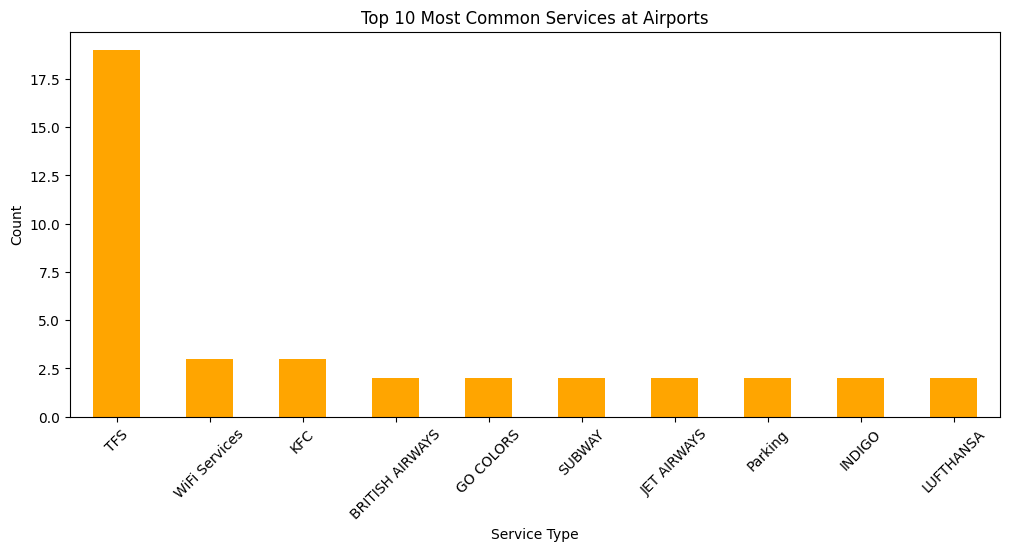

In [28]:
plt.figure(figsize=(12, 5))
df["titleEnglish"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Most Common Services at Airports")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Airports with the Most Special Assistance Services

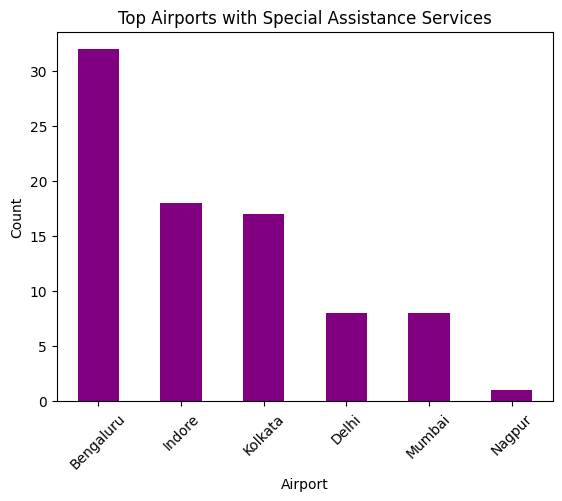

In [32]:
df_assistance = df[df["categoryenglish"] == "Special Assistance Services"]
df_assistance["airport"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Top Airports with Special Assistance Services")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Word Cloud of Service Titles

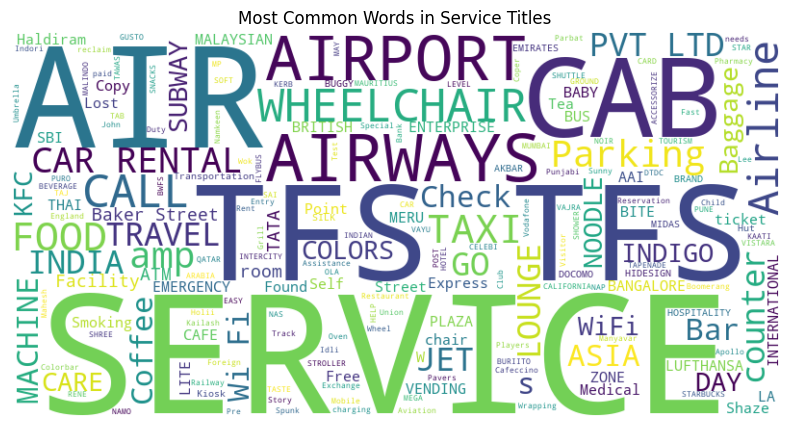

In [35]:
from wordcloud import WordCloud

text = " ".join(df["titleEnglish"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Service Titles")
plt.show()
